Cluster Sizes:
 Cluster
0    123
2     39
1     38
Name: count, dtype: int64
Cluster Means:
          CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0              62.0  40.325203           44.154472               49.829268   
1             162.0  40.394737           87.000000               18.631579   
2             162.0  32.692308           86.538462               82.128205   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  


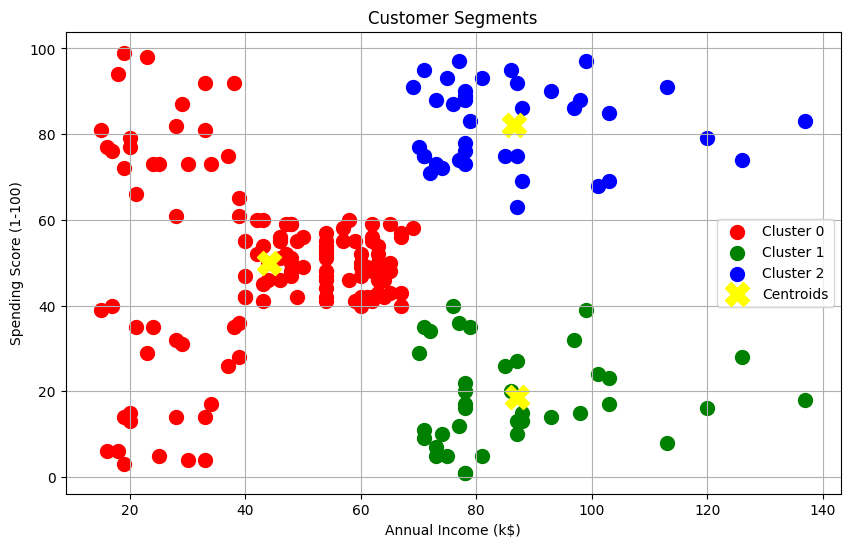

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Prepare the Data
data = pd.read_csv('/content/Mall_Customers.csv')

# Step 2: Standardize the Data
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Implement k-Means Clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_

# Step 4: Evaluate the Clusters
cluster_sizes = data['Cluster'].value_counts()
print("Cluster Sizes:\n", cluster_sizes)

# Calculate the mean values of numeric features for each cluster
numeric_columns = data.select_dtypes(include=['number']).columns
cluster_means = data.groupby('Cluster')[numeric_columns].mean()
print("Cluster Means:\n", cluster_means)

# Step 5: Plot the Clusters
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
for cluster in range(num_clusters):
    plt.scatter(
        data[data['Cluster'] == cluster]['Annual Income (k$)'],
        data[data['Cluster'] == cluster]['Spending Score (1-100)'],
        s=100,
        c=colors[cluster],
        label=f'Cluster {cluster}'
    )

# Plot cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=300,
    c='yellow',
    marker='X',
    label='Centroids'
)

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()
